#**Problem 1:**
#Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

**CPM** = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

**CPC** = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

**CTR** = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.

In [ ]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings("ignore")

###1.1 Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [ ]:
df=pd.read_excel('Clustering Clean Ads_Data-2.xlsx')

In [ ]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [ ]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [ ]:
df.shape

(23066, 19)

In [ ]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


##1.2
Treat missing values in CPC, CTR and CPM using the formula given. You may refer to the Bank_KMeans Solution File to understand the coding behind treating the missing values using a specific formula. You have to basically create an user defined function and then call the function for imputing.

CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset.

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset.

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.



In [ ]:
def calculate_CPM(x):
    Spend=df.Spend
    Impressions=df.Impressions
    CPM = (Spend/(Impressions)*1000)
    return CPM

In [ ]:
df['CPM']= df[['CPM']].apply(lambda x: calculate_CPM(x))

In [ ]:
def calculate_CTR(y):
    Clicks=df.Clicks
    Impressions=df.Impressions
    CTR = (Clicks/(Impressions)*100)
    return CTR

In [ ]:
df['CTR']= df[['CTR']].apply(lambda y: calculate_CTR(y))

In [ ]:
def calculate_CPC(z):
    Spend=df.Spend
    Clicks=df.Clicks
    CPC = (Spend/Clicks)
    return CPC

In [ ]:
df['CPC']= df[['CPC']].apply(lambda z: calculate_CPC(z))

In [ ]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

##1.3
Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

In [ ]:
#Creating two sets for categorical & Numerical variables
num = []
cat = []
for i in df.columns:
  if df[i].dtype == 'object':
    cat.append(i)
  else:
    num.append(i)

print(num)
print(cat)

['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']
['Timestamp', 'InventoryType', 'Ad Type', 'Platform', 'Device Type', 'Format']


In [ ]:
df_num = df[num]

In [ ]:
df_num

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,300,250,75000,1806,325,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00
1,300,250,75000,1780,285,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00
2,300,250,75000,2727,356,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00
3,300,250,75000,2430,497,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00
4,300,250,75000,1218,242,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07


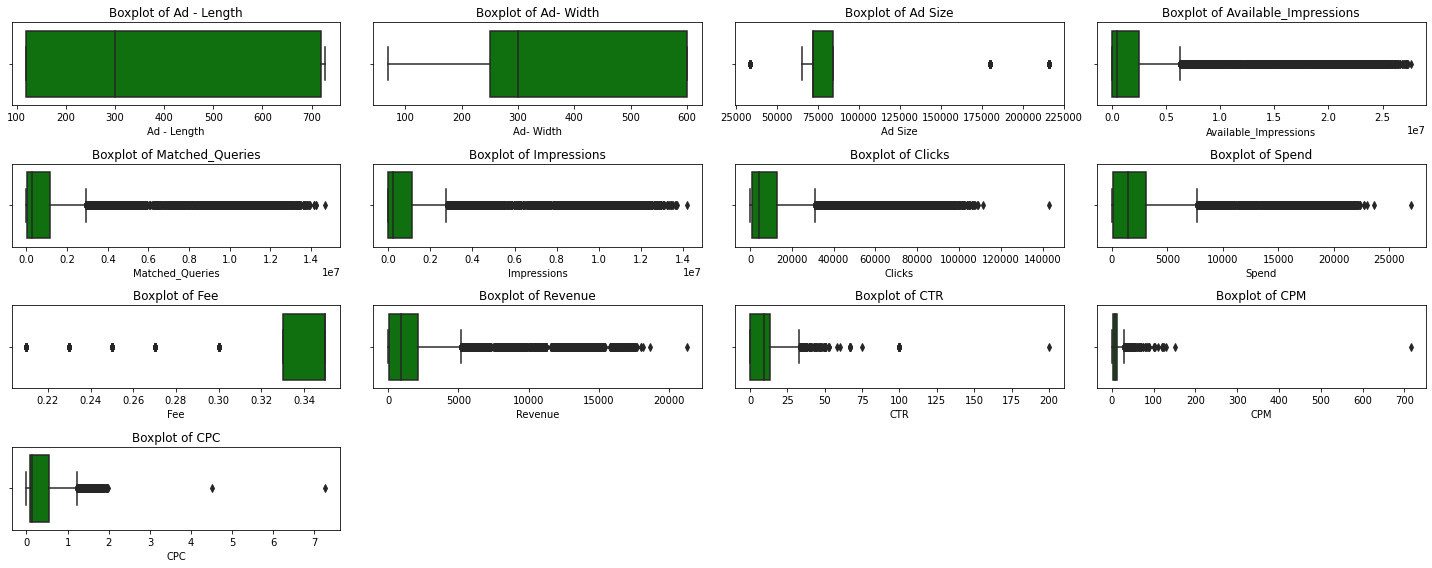

In [ ]:
#Checking the outliers using Boxplot
plt.figure(figsize = (20,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x = df_num[feature_list[i]], data = df_num, color = "green")
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [ ]:
#we will treat the outliers on 1.5*IQR forumula for Upper & lower range
def treat_outlier(col):
  Q1, Q3 = np.percentile(col, [25, 75])
  IQR = Q3 - Q1
  ur = Q3 + 1.5 * IQR
  lr = Q1 - 1.5 * IQR
  return ur, lr

In [ ]:
for i in df_num.columns:
  UR, LR = treat_outlier(df_num[i])
  df_num[i] = np.where(df_num[i] > UR, UR, df_num[i])
  df_num[i] = np.where(df_num[i] < LR, LR, df_num[i])

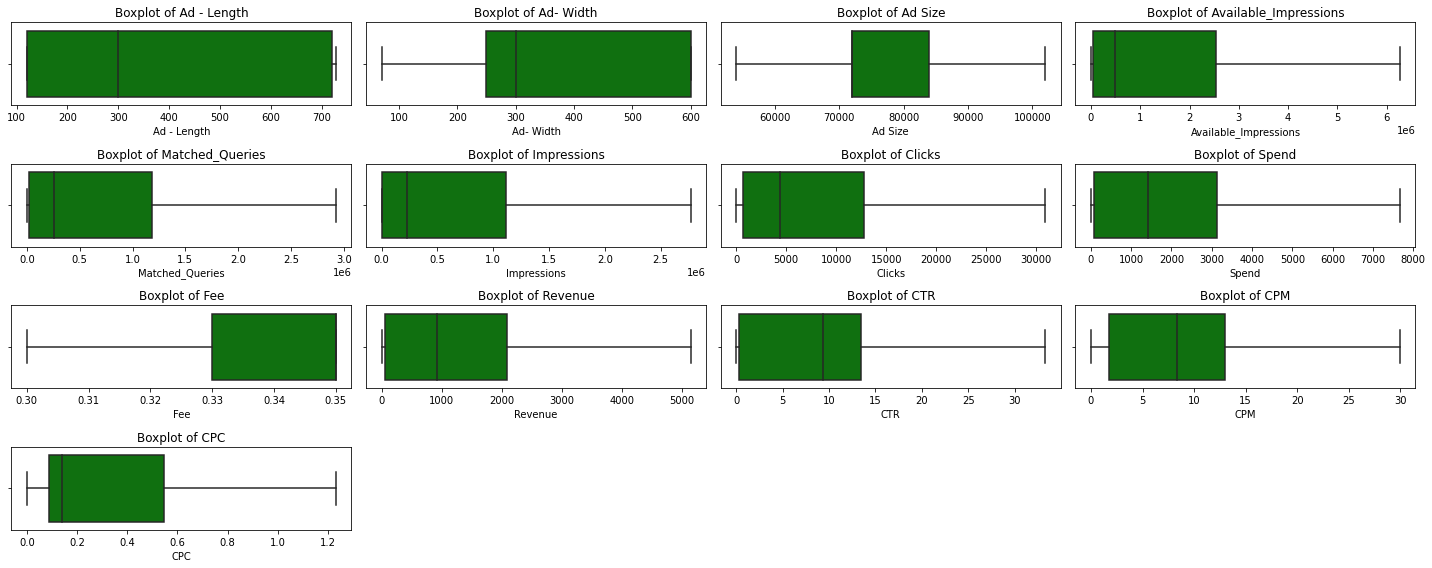

In [ ]:
#Boxplot after Outlier treatment
plt.figure(figsize = (20,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x = df_num[feature_list[i]], data = df_num, color = "green")
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

##1.4
Perform z-score scaling and discuss how it affects the speed of the algorithm.

In [ ]:
#Appluing z score
scaled_df = df_num.apply(zscore)

In [ ]:
#head & tail of the scaled dataset
scaled_df

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.102518,-0.755333,-0.778949,-0.768478,-0.867488,-0.893170,0.535724,-0.880093,-0.958836,-1.194498,-1.042561
1,-0.364496,-0.432797,-0.102518,-0.755345,-0.778988,-0.768516,-0.867488,-0.893170,0.535724,-0.880093,-0.953835,-1.194498,-1.042561
2,-0.364496,-0.432797,-0.102518,-0.754900,-0.778919,-0.768445,-0.867488,-0.893170,0.535724,-0.880093,-0.962218,-1.194498,-1.042561
3,-0.364496,-0.432797,-0.102518,-0.755040,-0.778781,-0.768302,-0.867488,-0.893170,0.535724,-0.880093,-0.971871,-1.194498,-1.042561
4,-0.364496,-0.432797,-0.102518,-0.755610,-0.779030,-0.768560,-0.867488,-0.893170,0.535724,-0.880093,-0.946281,-1.194498,-1.042561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435
23062,1.433093,-0.186599,1.652896,-0.756181,-0.779264,-0.768805,-0.867488,-0.893154,0.535724,-0.880078,3.035808,1.712113,-0.916204
23063,1.433093,-0.186599,1.652896,-0.756182,-0.779265,-0.768806,-0.867488,-0.893150,0.535724,-0.880074,3.035808,3.162718,-0.884614
23064,-1.134891,1.290590,-0.297564,-0.756179,-0.779265,-0.768806,-0.867488,-0.893141,0.535724,-0.880066,3.035808,3.162718,-0.821435


In [ ]:
#Summary of scaled dataset
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,1.281478e-16,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,-1.182903e-16,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,3.055833e-16,1.000022,-1.467840,-0.297564,-0.297564,0.482620,1.652896
Available_Impressions,23066.0,9.857525e-18,1.000022,-0.756182,-0.740341,-0.528577,0.433059,2.193158
Matched_Queries,23066.0,1.971505e-17,1.000022,-0.779265,-0.761447,-0.527722,0.371498,2.070914
Impressions,23066.0,0.000000e+00,1.000022,-0.768806,-0.760655,-0.538975,0.366051,2.056111
Clicks,23066.0,-1.182903e-16,1.000022,-0.867488,-0.793438,-0.405431,0.468629,2.361729
Spend,23066.0,-9.857525e-17,1.000022,-0.893170,-0.858046,-0.305523,0.393932,2.271900
Fee,23066.0,1.143473e-15,1.000022,-2.222416,-0.567532,0.535724,0.535724,0.535724
Revenue,23066.0,3.943010e-17,1.000022,-0.880093,-0.846474,-0.317607,0.389803,2.244218


##1.5
Perform Hierarchical Clustering by constructing a Dendrogram using WARD and Euclidean distance.

In [ ]:
#
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
wardlink = linkage(scaled_df, method = 'ward', metric = 'euclidean')

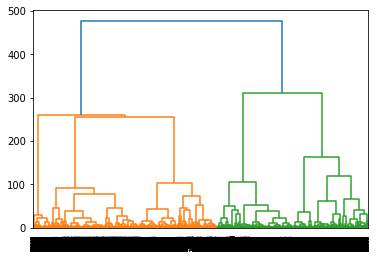

In [ ]:
dend = dendrogram(wardlink)

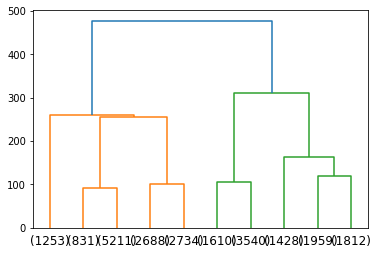

In [ ]:
#Plotting for p=10
dendro = dendrogram(wardlink, truncate_mode = 'lastp', p = 10)

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
clusters = fcluster(wardlink, 5, criterion='maxclust')
clusters

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

In [ ]:
df['clusters'] = clusters


In [ ]:
#Cluster Frequency
df['clusters'].value_counts().sort_index()

1    1253
2    6042
3    5422
4    5150
5    5199
Name: clusters, dtype: int64

In [ ]:
#checkuing the head of datset
df.head()


,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,4
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0,4
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0,4
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0,4
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0,4


##1.6
Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

In [ ]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

183349.10202886112

In [ ]:
k_means.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
k_means = KMeans(n_clusters = 3,random_state=0)
k_means.fit(scaled_df)
k_means.inertia_

130878.35297256624

In [ ]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

95133.9504542069

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

61539.18919785395

In [ ]:
wss =[]

In [ ]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [ ]:
wss

[299857.99999999866,
 183349.10202886112,
 130878.34502504522,
 95573.82185892056,
 61539.18919785395,
 51676.89230709949,
 44598.25849746805,
 39597.85007020004,
 36061.691946441555,
 32980.97416785824]

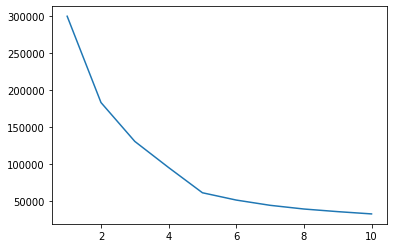

In [ ]:
plt.plot(range(1,11), wss)

In [ ]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
labels = k_means.labels_

In [ ]:
df["Clus_kmeans"] = labels
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.00,0.35,0.0000,0.309598,0.0,0.00,4,0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.00,0.35,0.0000,0.350877,0.0,0.00,4,0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.00,0.35,0.0000,0.281690,0.0,0.00,4,0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,495,1,0.00,0.35,0.0000,0.202020,0.0,0.00,4,0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,242,1,0.00,0.35,0.0000,0.413223,0.0,0.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,...,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07,3,1
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,...,2,1,0.04,0.35,0.0260,50.000000,20.0,0.04,3,1
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,...,1,1,0.05,0.35,0.0325,100.000000,50.0,0.05,3,1
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,...,1,1,0.07,0.35,0.0455,100.000000,70.0,0.07,2,4


##1.7
Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
silhouette_score(scaled_df,labels)

0.5240956940501831

In [ ]:
KM = KMeans(n_clusters=5)
KM.fit(scaled_df)
labels = KM.labels_
labels

array([3, 3, 3, ..., 4, 0, 4], dtype=int32)

In [ ]:
for i in range(2, 11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    labels = KM.labels_
    print(i)
    print(KM.inertia_)
    print(silhouette_score(scaled_df, labels))
    print(silhouette_samples(scaled_df, labels).min(), '\n')

2
183349.10202886112
0.38572769619101077
-0.052971575130041706 

3
130878.34240367389
0.3825486036570082
-0.13228597797973302 

4
95133.92787211924
0.44534519247649795
-0.1357679674165574 

5
61539.18919785395
0.5240956940501831
-0.03709167751991964 

6
51676.89230709949
0.5221533662938636
-0.05673927439483464 

7
44598.27017775255
0.5165635029478517
-0.04895751557522969 

8
39597.845940435145
0.4797334335943954
-0.19992415610651804 

9
36416.08889383626
0.4268561290616763
-0.04845106420830564 

10
32980.98555345895
0.4363183491890311
-0.28363411406113 



In [ ]:
df['Clus_kmeans'].value_counts().sort_index()

0    6275
1    4676
2    4054
3    1537
4    6524
Name: Clus_kmeans, dtype: int64

In [ ]:
sil_width = silhouette_samples(scaled_df,labels)

In [ ]:
df["sil_width"] = sil_width
df

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Clus_kmeans,sil_width
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,1,0.00,0.35,0.0000,0.309598,0.0,0.00,4,0,0.167127
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,1,0.00,0.35,0.0000,0.350877,0.0,0.00,4,0,0.167182
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,1,0.00,0.35,0.0000,0.281690,0.0,0.00,4,0,0.167065
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,...,1,0.00,0.35,0.0000,0.202020,0.0,0.00,4,0,0.166840
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,...,1,0.00,0.35,0.0000,0.413223,0.0,0.00,4,0,0.167201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,...,1,0.07,0.35,0.0455,100.000000,70.0,0.07,3,1,0.167324
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,...,1,0.04,0.35,0.0260,50.000000,20.0,0.04,3,1,0.234463
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,...,1,0.05,0.35,0.0325,100.000000,50.0,0.05,3,1,0.166888
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,...,1,0.07,0.35,0.0455,100.000000,70.0,0.07,2,4,0.336086


##1.8
Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [ ]:
df.Clus_kmeans.value_counts().sort_index()

0    6275
1    4676
2    4054
3    1537
4    6524
Name: Clus_kmeans, dtype: int64

In [ ]:
clust_profile=df.drop(['Timestamp'],axis=1)
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=df.Clus_kmeans.value_counts().sort_index()
a = df[num]
a['Clus_kmeans'] = labels
clust_profile

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,sil_width,freq
Clus_kmeans,,,,,,,,,,,,,,,,
0,421.696255,152.001594,55008.841434,1.810314e+06,8.642623e+05,8.262209e+05,3263.131952,1500.090563,0.349264,977.424163,0.404392,1.788731,0.544614,4.182470,0.462918,6275
1,683.825492,303.785287,206160.821215,2.513465e+05,1.375509e+05,1.167714e+05,14406.540205,1252.285569,0.349538,815.541831,13.857220,12.098200,0.090012,3.001069,0.403032,4676
2,465.781944,199.148989,75176.566354,1.038821e+07,5.625808e+06,5.447310e+06,11245.754810,8646.647997,0.290439,6373.659814,0.217242,1.573280,0.760929,5.000000,0.496704,4054
3,141.454782,572.446324,75614.834092,8.063284e+05,5.668641e+05,4.781485e+05,65315.176318,6990.360898,0.288302,5017.538285,13.752664,15.385753,0.111918,1.202342,0.663108,1537
4,143.280809,572.103004,76597.026364,3.209356e+04,1.962406e+04,1.349204e+04,1914.448804,209.162609,0.349988,135.993379,16.037897,14.693481,0.102794,2.115573,0.343639,6524


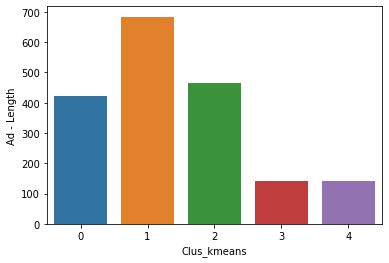

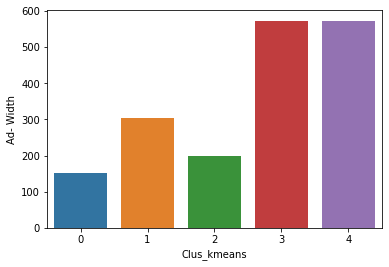

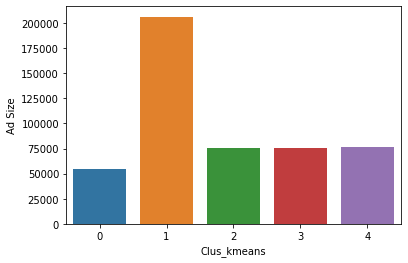

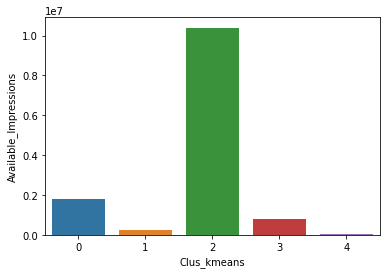

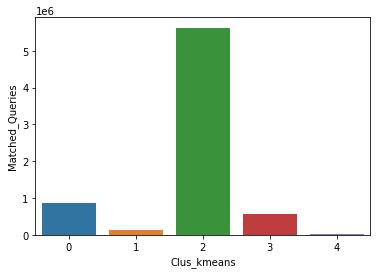

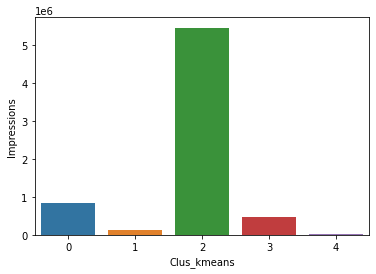

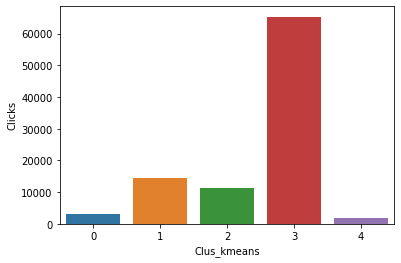

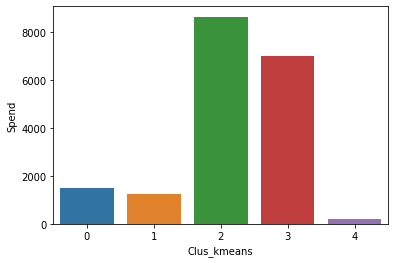

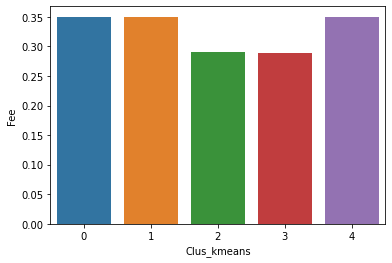

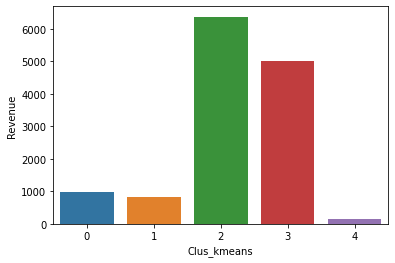

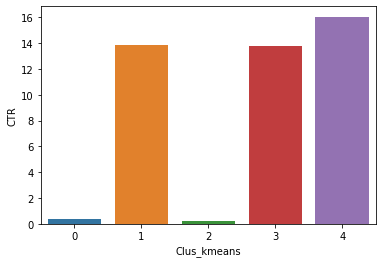

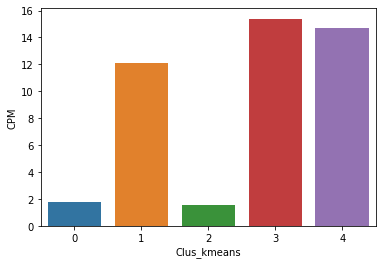

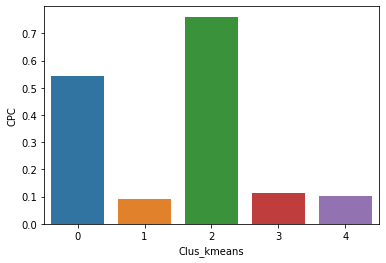

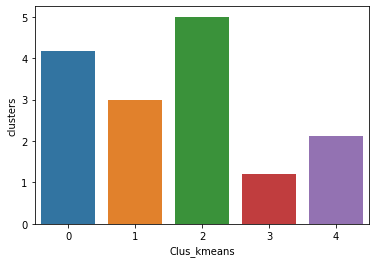

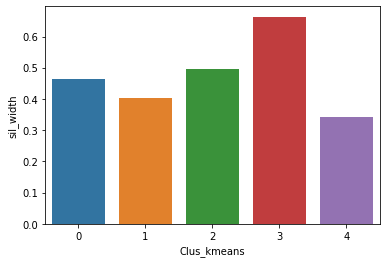

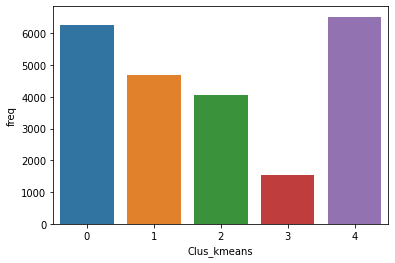

In [ ]:
for i in clust_profile.columns:
  sns.barplot(y = clust_profile[i], x = clust_profile.index, data = clust_profile)
  plt.show()